In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

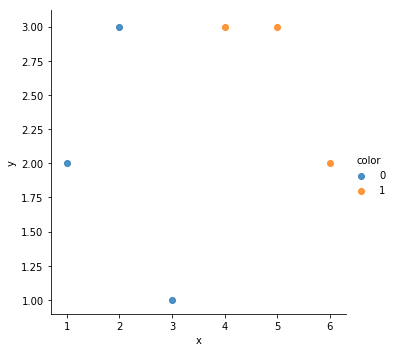

In [2]:
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]
x = np.asarray(x_data)
y = np.reshape(y_data,[-1])
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], color=y))
sns.lmplot('x', 'y', data=df, hue='color', fit_reg=False)
plt.show()

In [3]:
X = tf.placeholder(tf.float32,[None,2])
Y = tf.placeholder(tf.float32,[None,1])

logits = tf.layers.dense(X,1,activation=None)

Y_ = tf.nn.sigmoid(logits)
predict = tf.round(Y_)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y))
train = tf.train.AdamOptimizer(0.01).minimize(cost)


In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10001):
    c,_ = sess.run([cost,train],feed_dict={X:x_data,Y:y_data})
    if i%1000==0:
        print('cost:',c)
print('Finish')

cost: 4.188843
cost: 0.25717637
cost: 0.11000519
cost: 0.0568976
cost: 0.03227235
cost: 0.019105619
cost: 0.011548747
cost: 0.007054677
cost: 0.0043330365
cost: 0.0026691596
cost: 0.0016468582
Finish


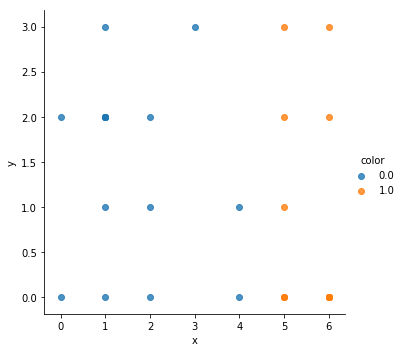

In [6]:
import random
data=[]
pred=[]
for i in range(0,30):
    x = random.randint(0,6)
    y = random.randint(0,3)
    data.append([x,y])
    pred.append(sess.run(predict,feed_dict={X:[[x,y]]}))
    
data = np.asarray(data)
pred = np.reshape(pred,[-1])

df = pd.DataFrame(dict(x=data[:,0], y=data[:,1], color=pred))
sns.lmplot('x', 'y', data=df, hue='color', fit_reg=False)
plt.show()
